In [9]:
from langgraph.graph import StateGraph, START, END
from typing import TypedDict


In [10]:
# Step 1: Define State

class cricketState(TypedDict):
    runs: int
    balls: int
    fours: int
    sixes: int
    strike_rate: float
    boundary_percentage: float
    balls_per_boundary: float
    summary : str
    
# Step 2: Define functions to calculate strike rate
def calculate_strike_rate(state: cricketState) -> cricketState:
    runs = state['runs']
    balls = state['balls']
    state['strike_rate'] = round((runs / balls) * 100, 2) if balls > 0 else 0.0
    return state

# Step 3: Define functions to calculate boundary percentage
def calculate_boundary_percentage(state: cricketState) -> cricketState:
    runs = state['runs']
    boundary_runs = (state['fours'] * 4) + (state['sixes'] * 6)
    state['boundary_percentage'] = round((boundary_runs / runs) * 100, 2) if runs > 0 else 0.0
    return state    

# Step 4: Define functions to calculate balls per boundary
def calculate_balls_per_boundary(state: cricketState) -> cricketState:
    balls = state['balls']
    boundaries = state['fours'] + state['sixes']
    state['balls_per_boundary'] = round(balls / boundaries, 2) if boundaries > 0 else 0.0
    return state

def calculate_performance_metrics(state: cricketState) -> cricketState:
    state = calculate_strike_rate(state)
    state = calculate_boundary_percentage(state)
    state = calculate_balls_per_boundary(state)
    return state

def summary(state: cricketState) -> str:
    summary = f"""Performance Summary:\n
      Strike Rate: {state['strike_rate']} \n
      Boundary Percentage: {state['boundary_percentage']} \n
      Balls per Boundary: {state['balls_per_boundary']}"""
    state['summary'] = summary
    return summary


In [11]:
cricket_graph = StateGraph(cricketState)


In [14]:
cricket_graph.add_node('calculate_strike_rate', calculate_strike_rate)
cricket_graph.add_node('calculate_boundary_percentage', calculate_boundary_percentage)
cricket_graph.add_node('calculate_balls_per_boundary', calculate_balls_per_boundary)
cricket_graph.add_node('summary', summary)

In [15]:
cricket_graph.add_edge(START, 'calculate_strike_rate')
cricket_graph.add_edge(START, 'calculate_boundary_percentage')
cricket_graph.add_edge(START, 'calculate_balls_per_boundary')
cricket_graph.add_edge('calculate_strike_rate', 'summary')
cricket_graph.add_edge('calculate_boundary_percentage', 'summary')        
cricket_graph.add_edge('calculate_balls_per_boundary', 'summary')
cricket_graph.add_edge('summary', END)

In [16]:
workflow= cricket_graph.compile()

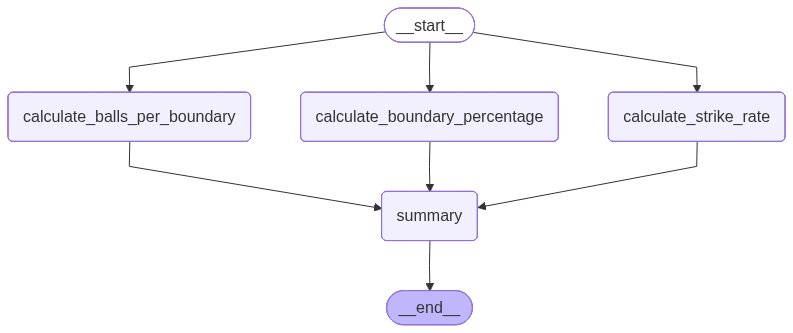

In [17]:
from IPython.display import Image
Image(workflow.get_graph().draw_mermaid_png())

In [21]:
initial_data = {
    "runs": 150,
    "balls": 120, 
    "fours": 15,
    "sixes": 5,
    "strike_rate": 0.0,
    "boundary_percentage": 0.0,
    "balls_per_boundary": 0.0,
    "summary": ""
}  

In [22]:
cricket_result = workflow.invoke(initial_data)

InvalidUpdateError: At key 'runs': Can receive only one value per step. Use an Annotated key to handle multiple values.
For troubleshooting, visit: https://docs.langchain.com/oss/python/langgraph/errors/INVALID_CONCURRENT_GRAPH_UPDATE